In [15]:
import numpy as np
# import matplotlib.pyplot as plt

## Simple layer

In [16]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

In [17]:
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [0.44, 0.73, -0.13]]

biases2 = [-1 , 2, -0.5]

In [18]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

In [7]:
print(layer1_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [ ]:
layer2_outputs = np.dot(layer1_outputs, weights2) + biases2

In [20]:
print(layer2_outputs)

[[ 0.5031  -1.04185  2.18525]
 [ 0.2434  -2.7332   2.0687 ]
 [-0.99314  1.41254  0.88425]]


### Dense Layer

In [23]:
# Input
X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

In [43]:
# Hidden Layers
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [ ]:
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 3)

In [51]:
layer1.forward(X)
print(layer1.output)

[[ 2.99163523 -6.70040612  2.55778761 -0.54837075 -0.07315388]
 [-0.87067962  3.92853296  3.17548421  2.84382001 -0.7658539 ]
 [ 2.73268648 -4.93222658 -3.53086934 -5.40675974 -4.52357986]]


In [52]:
layer2.forward(layer1.output)
print(layer2.output)

[[  2.94406666  -3.23482612  -3.88910975]
 [ -3.0673566   -0.28965616   7.79082823]
 [  8.80858639  -1.49313299 -16.01702372]]


### Activation Function for Hidden Layer

In [87]:
# Activation ReLU
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, input)

In [89]:
# ReLu function for testing
inputs  = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0, i))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [78]:
import nnfs
from nnfs.datasets import spiral_data

In [79]:
nnfs.init()

In [83]:
np.random.seed(0)

In [84]:
X, y = spiral_data(100, 3)

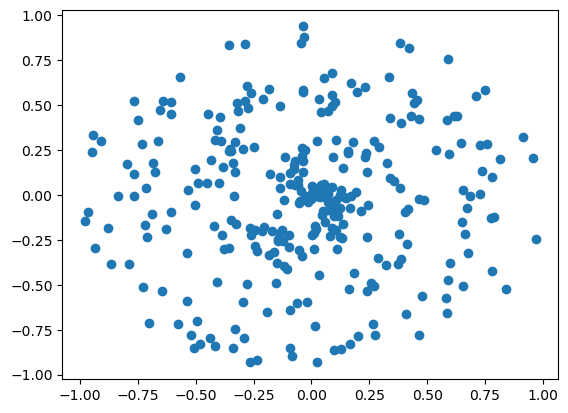

In [86]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

### Activation Function for Output Layer

In [114]:
import math
import numpy as np
E = math.e
E

2.718281828459045

In [111]:
layer_outputs = [4.8, 1.21, 2.385]

In [115]:
# Exponential Function
exp_values = []

for output in layer_outputs:
    exp_values.append(E**output)

exp_values

[121.51041751873483, 3.353484652549023, 10.859062664920513]

In [113]:
# Normalization
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value/norm_base)

print(norm_values)

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


In [121]:
# Using Numpy (Exponential Function & Normalization)
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)
print(f"Exp_values: {exp_values}\nNorm_values: {norm_values}")


Exp_values: [121.51041752   3.35348465  10.85906266]
Norm_values: [0.89528266 0.02470831 0.08000903]


In [126]:
# For batch workflow (batch input -> batch output)
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

In [134]:
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(exp_values)
print(norm_values)

[[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.63654137e-01 1.22140276e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]
[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [135]:
# To prevent overflow we subtract 
# max value and then proceed to exp and normalization

### Loss function (Categorical Cross-Entropy)
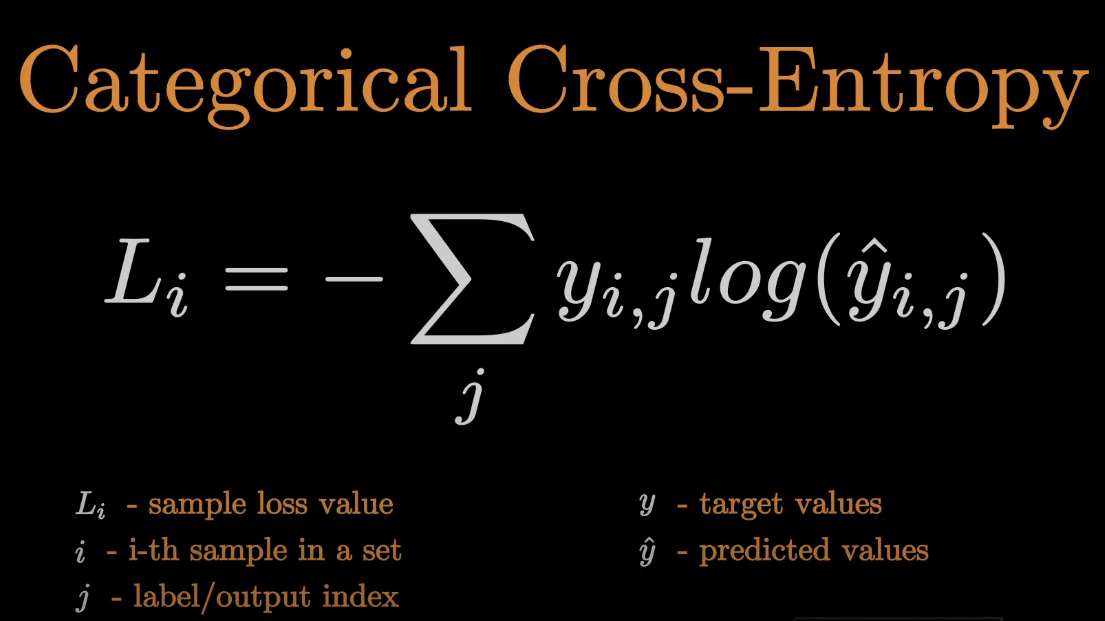

In [1]:
import math
real_output = [1, 0, 0] # One Hot Encoded 
predicted_output = [0.7, 0.2, 0.1]

In [4]:
loss1 = -(math.log(predicted_output[0]) * real_output[0] +
          math.log(predicted_output[1]) * real_output[1] +
          math.log(predicted_output[2]) * real_output[2])
loss1

0.35667494393873245

In [3]:
# Same as above but shorter
loss = -math.log(predicted_output[0])
loss

0.35667494393873245

# Full Code

In [92]:
import nnfs
from nnfs.datasets import spiral_data

In [93]:
nnfs.init()
np.random.seed(0)

In [90]:
# Hidden Layers
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [101]:
# Activation ReLU
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [136]:
# Activation Softmax
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [5]:
# Loss function
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [6]:
# Catergorical Cross Entropy Loss Function
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidence)
        return negative_log_likelihoods


In [138]:
X, y = spiral_data(samples=100, classes=3)

In [139]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

In [140]:
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [141]:
dense1.forward(X)
activation1.forward(dense1.output)

In [142]:
dense2.forward(activation1.output)
activation2.forward(dense2.output)

In [ ]:
print(activation2.output[:5])

In [ ]:
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)

In [ ]:
print("Loss: ", loss)